In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [12]:
database_url = 'sqlite:///db/mydataproject.sql3'

engine = create_engine(database_url)
query = 'SELECT * FROM fruits'

with engine.connect() as conn:
    pd.read_sql_query(query, engine)
# engine.dispose()


OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [9]:
# query = 'SELECT * FROM fruits'
# df = pd.read_sql_query(query, engine)

df.head()

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
fiber_g_df = df[['long_desc', 'fiber_in_g']].sort_values(by="fiber_in_g",ascending=False)
top_20_values = fiber_g_df.head(30)
print(top_20_values)


In [ ]:
fiber_kcal_df = df[['long_desc', 'fiber_in_100kcal']].sort_values(by='fiber_in_100kcal',ascending=False)
top_20_values = fiber_kcal_df.head(30)
print(top_20_values)


In [ ]:
# As we can see in the data, results are as expected: dried fruits don't have much water compared to raw fruits, so their fiber content is way bigger that raw fruits.
# If we compare values in kcal, we can see that berries (Raspberries and Blackberries) take the lead! Now let's move on to vegetables.

In [ ]:
query = 'SELECT * FROM vegetables'
df = pd.read_sql_query(query, engine)

df.head()


In [ ]:
fiber_g_df = df[['long_desc', 'fiber_in_g']].sort_values(by="fiber_in_g",ascending=False)
top_20_values = fiber_g_df.head(30)
print(top_20_values)


In [4]:
fiber_kcal_df = df[['long_desc', 'fiber_in_100kcal']].sort_values(by='fiber_in_100kcal',ascending=False)
top_20_values = fiber_kcal_df.head(30)
print(top_20_values)

NameError: name 'df' is not defined

In [5]:
# As we can see, most fiber is in cooked vegetables. However, if we compare fiber in 100kcal, we can see that both cooked and raw vegetables dominate the top20 

In [6]:
# Now we can plot the data to see how fiber content correlates with energy content.

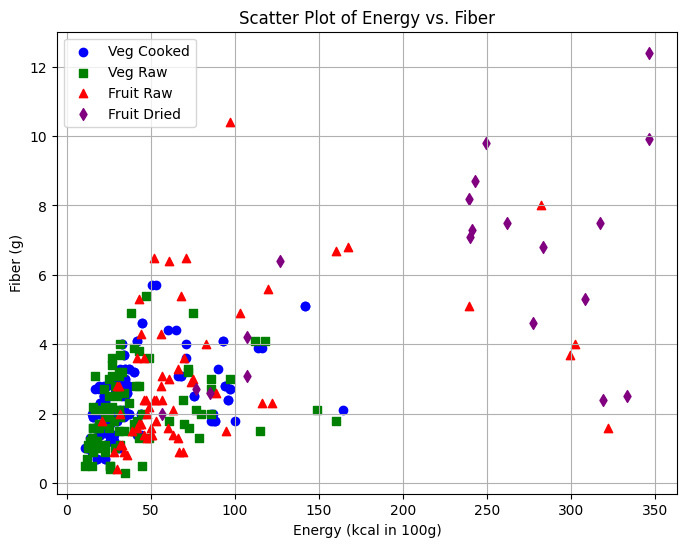

In [14]:
query_vc = 'SELECT * FROM vegetables_cooked'
df_v_vc = pd.read_sql_query(query_vc, engine)

query_vr = 'SELECT * FROM vegetables_raw'
df_v_vr = pd.read_sql_query(query_vr, engine)

query_fd = 'SELECT * FROM fruits_dried'
df_v_fd = pd.read_sql_query(query_fd, engine)

query_fr = 'SELECT * FROM fruits_raw'
df_v_fr = pd.read_sql_query(query_fr, engine)

# veg_cooked = df_v_vc['fiber_in_g', ["energy_in_kcal"]
# veg_raw = df_v_vr['fiber_in_g', ["energy_in_kcal"]
# fruit_raw = df_v_fr['fiber_in_g', ["energy_in_kcal"]
# fruit_dried = df_v_fd['fiber_in_g', ["energy_in_kcal"]

plt.figure(figsize=(8, 6))
plt.scatter(df_v_vc['kcal_in_100g'], df_v_vc['fiber_in_g'], label='Veg Cooked', color='blue', marker='o')

plt.scatter(df_v_vr['kcal_in_100g'], df_v_vr['fiber_in_g'], label='Veg Raw', color='green', marker='s')

plt.scatter(df_v_fr['kcal_in_100g'], df_v_fr['fiber_in_g'], label='Fruit Raw', color='red', marker='^')

plt.scatter(df_v_fd['kcal_in_100g'], df_v_fd['fiber_in_g'], label='Fruit Dried', color='purple', marker='d')


plt.xlabel('Energy (kcal in 100g)')
plt.ylabel('Fiber (g)')
plt.title('Scatter Plot of Energy vs. Fiber')
plt.legend()


plt.grid(True)
plt.show()

In [ ]:
# We can see from the graph that vegetables are more likely to be less caloric than fruits.

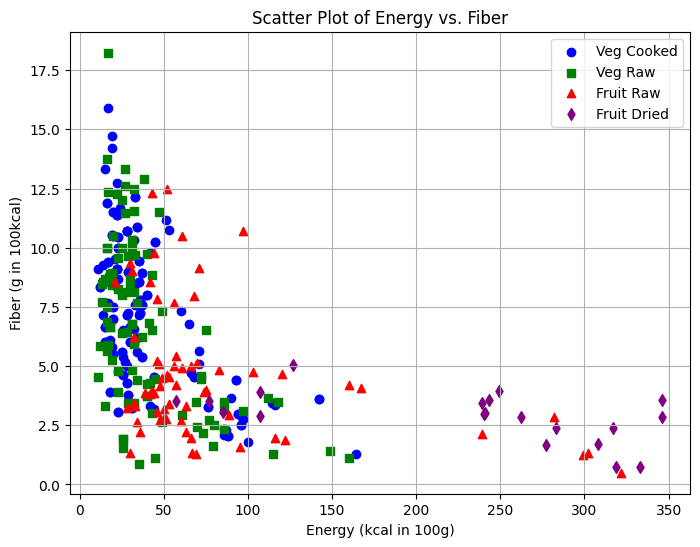

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_v_vc['kcal_in_100g'], df_v_vc['fiber_in_100kcal'], label='Veg Cooked', color='blue', marker='o')

plt.scatter(df_v_vr['kcal_in_100g'], df_v_vr['fiber_in_100kcal'], label='Veg Raw', color='green', marker='s')

plt.scatter(df_v_fr['kcal_in_100g'], df_v_fr['fiber_in_100kcal'], label='Fruit Raw', color='red', marker='^')

plt.scatter(df_v_fd['kcal_in_100g'], df_v_fd['fiber_in_100kcal'], label='Fruit Dried', color='purple', marker='d')

plt.xlabel('Energy (kcal in 100g)')
plt.ylabel('Fiber (g in 100kcal)')
plt.title('Scatter Plot of Energy vs. Fiber')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
# Now lets move on to vitamins! First of all, it is interesting to see which vitamins dominate in which category. So let's take 
# a look at graphs, which category dominates and why.

TypeError: boxplot() got an unexpected keyword argument 'label'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Now we will discuss everything about Magnesium. As we can see, there are no major differences between cooked and raw vegetables apart from those top3 values 
# raw vegetables, which appears to be seaweed! So to better understand my data and gain insights I am going to see only the content of raw vegatbles and raw fruits, 
# which have the most magnesium

<Figure size 600x300 with 0 Axes>

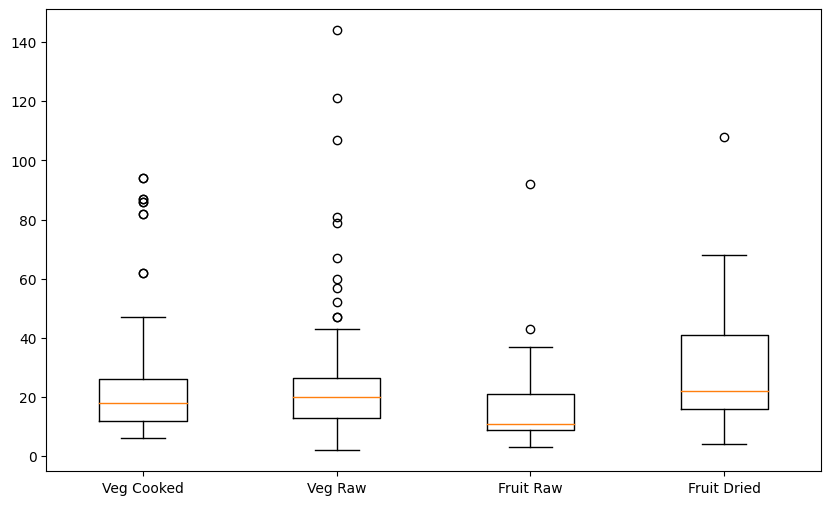

In [20]:

data = [df_v_vc['mg_in_mg'], df_v_vr['mg_in_mg'], df_v_fr['mg_in_mg'], df_v_fd['mg_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [25]:
top = df_v_vr[['long_desc', 'mg_mg_in_100kcal']].sort_values(by='mg_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

top = df_v_vr[['long_desc', 'mg_in_mg']].sort_values(by="mg_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  mg_mg_in_100kcal
19                                  Chard, swiss, raw        426.315789
57                                       Spinach, raw        343.478261
86                                       Nopales, raw        325.000000
54                            Seaweed, irishmoss, raw        293.877551
55                                 Seaweed, kelp, raw        281.395349
53                                 Seaweed, agar, raw        257.692308
76                               Seaweed, wakame, raw        237.777778
70                                    Watercress, raw        190.909091
85                                       Arugula, raw        188.000000
40                                          Okra, raw        172.727273
12                   Cabbage, chinese (pak-choi), raw        146.153846
21                                        Chives, raw        140.000000
59                       Squash, summer, scallop, raw        127

In [26]:
top = df_v_fr[['long_desc', 'mg_mg_in_100kcal']].sort_values(by='mg_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

top = df_v_fr[['long_desc', 'mg_in_mg']].sort_values(by="mg_in_mg",ascending=False)
top_20_values = top.head(30)
print(top_30_values)

                                            long_desc  mg_mg_in_100kcal
55                                       Rhubarb, raw         57.142857
42                                       Papayas, raw         48.837209
9                                   Blackberries, raw         46.511628
54                                   Raspberries, raw         42.307692
36                                    Mulberries, raw         41.860465
57                                  Strawberries, raw         40.625000
34                                Melons, casaba, raw         39.285714
58                                     Tamarinds, raw         38.493724
33                            Melons, cantaloupe, raw         35.294118
59                                    Watermelon, raw         33.333333
26                                Guavas, common, raw         32.352941
12                        Carambola, (starfruit), raw         32.258065
56                                       Soursop, raw         31

<Figure size 600x300 with 0 Axes>

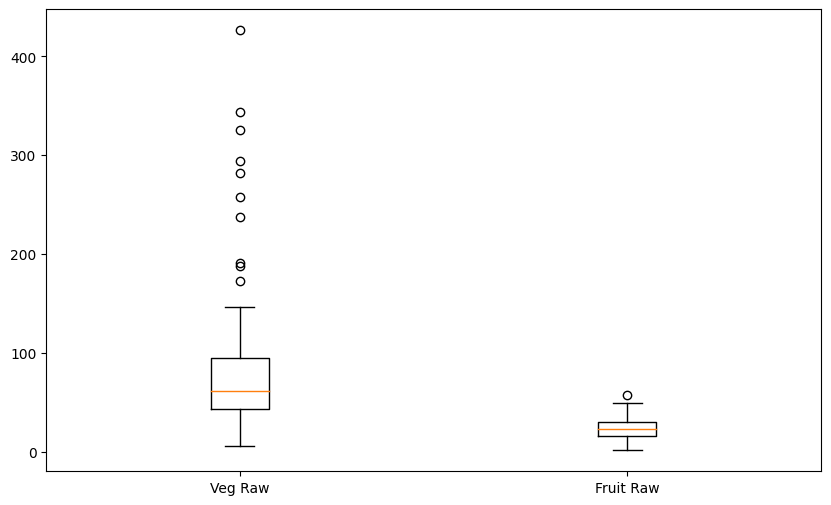

In [28]:
# Let's see how magnesium content distributes between 100kcal of products:

data = [df_v_vr['mg_mg_in_100kcal'], df_v_fr['mg_mg_in_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()